# Home Assignment 1

## Problem 1 (1 point). My Hashrate

This is a simple implemetation of Proof-of-Work function.
It takes current block header and block calculation difficulty as inputs and returns nonce for this block and the header of a mined block.

In [ ]:
import hashlib

def proof_of_work(header, target):
    max_nonce = 2 ** 32
    for nonce in range(max_nonce):
        hash_result = hashlib.sha256(str(header).encode('utf-8')+str(nonce).encode('utf-8')).hexdigest()

        if int(hash_result, 16) < target:
            return (hash_result, nonce)

The genesis block is calulated here.

In [ ]:
import time

nonce = 0
block_hash = ""
new_block = 'This is the genesis block' + block_hash

difficulty_bits = 8
target = 2 ** (256-difficulty_bits)

start_time = time.time()
(block_hash, nonce) = proof_of_work(new_block, target)
end_time = time.time()
elapsed_time = end_time - start_time

print("Success with nonce ", nonce)
print("Hash is ", block_hash)
print("Elapsed time: %.4f seconds" % elapsed_time)

Success with nonce  186
Hash is  005eaab75f55d7cef91c03f04052043056113f6ee14abfcf4a0562a019aa1cbe
Elapsed time: 0.0016 seconds


### Task

Choose such a target that you will calculated 20 160 000 blocks per 14 days in avarage. Prove it experimetally (estimate time for at least 1000 blocks; compute both mean and standard deviation of a single block generation).

*Note.* Each next block should be calculated using the hash of the previous one.

In [ ]:
seconds_in_14_days = 14 * 24 * 60 * 60
expected_blocks = 20160000

print("Expected time of 1000 blocks", seconds_in_14_days / 20160000 * 1000)
print("Expected time of 1 block", seconds_in_14_days / 20160000)

Expected time of 1000 blocks 60.0
Expected time of 1 block 0.06


In [ ]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def show_progress(log):
    mean = np.mean(log)
    std = np.std(log)

    clear_output(True)
    print("mean = %.3f, std=%.3f" % (mean, std))

    plt.hist(log, bins=20)
    plt.title("distribution of block time elapsed")
    plt.xlabel("time")

    plt.show()

mean = 0.006, std=0.001


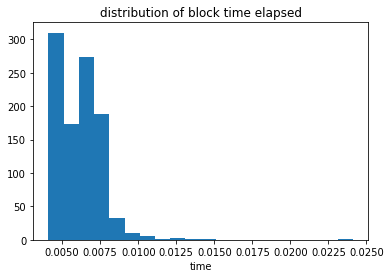

In [ ]:
block_hash = ""
new_block = 'This is the genesis block' + block_hash

difficulty_bits = 10
target = 2 ** (256-difficulty_bits)

log = []

for i in range(1000):
    start_time = time.time()
    (block_hash, nonce) = proof_of_work(new_block, target)
    end_time = time.time()
    elapsed_time = end_time - start_time
    log.append(elapsed_time)
    show_progress(log)


## Problem 2 (3 + 3* points). Merkle tree

Merkle hash trees play an important role in forming transaction blocks in blockchain. In this assignment we ask you to plot your own Merkle hash tree and check its' properties. Below we provide you with some code fragment what you can use in your assignment

In [ ]:
import matplotlib
import networkx as nx
# %matplotlib qt5
from networkx import balanced_tree, draw_networkx, draw

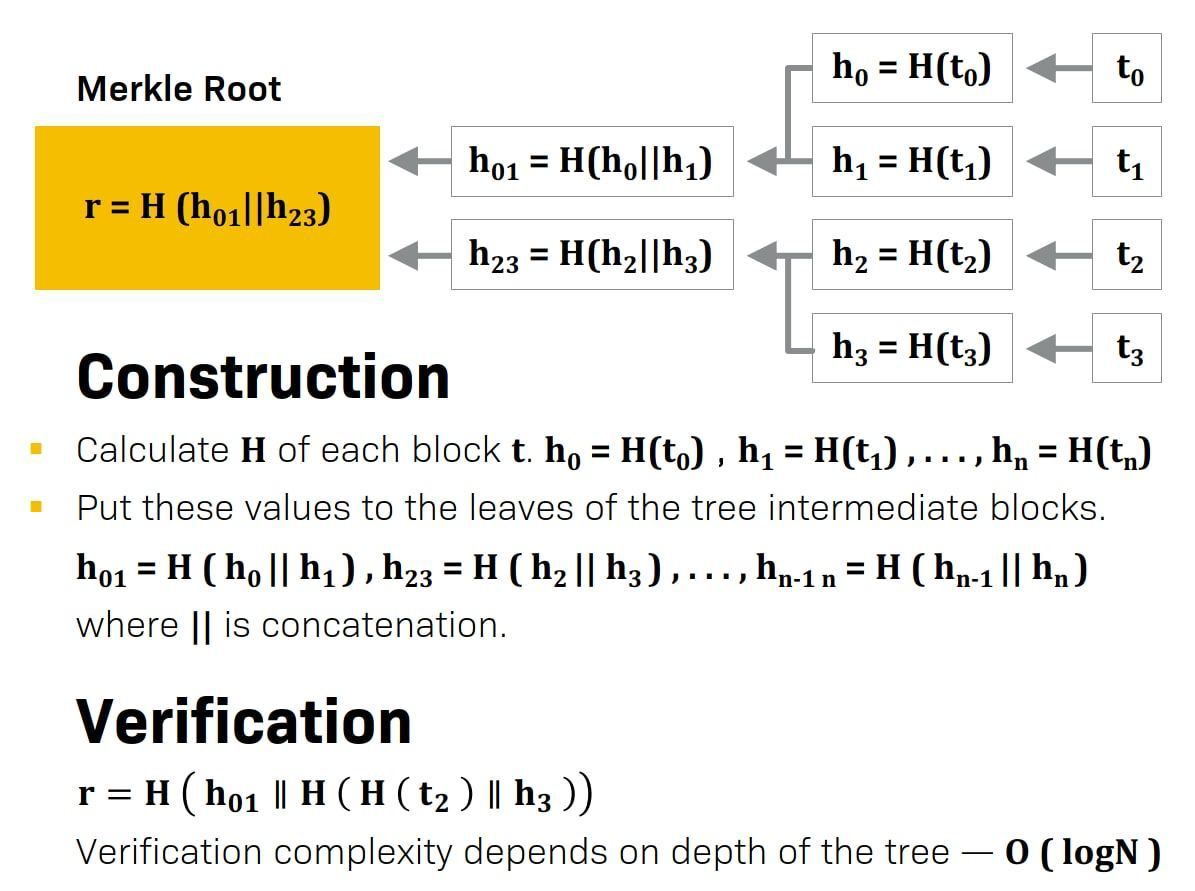

Let us plot graph basis for Merkle hash tree

{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '3'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

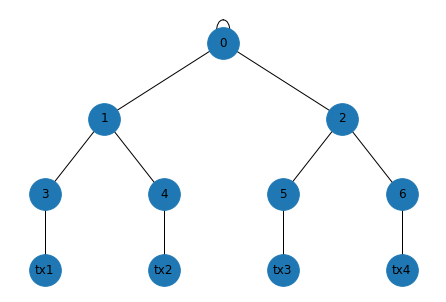

In [ ]:
G = nx.Graph()
positions = {}
coordinates = [
    [0, 4],
    [-2, 3],
    [2, 3],
    [-3, 2],
    [-1, 2],
    [1, 2],
    [3, 2],
    [-3, 1],
    [-1, 1],
    [1, 1],
    [3, 1]
]
parents = [0, 0, 0, 1, 1, 2, 2, 3, 4, 5, 6]
for index in range(11):
    G.add_node(index)
    G.add_edge(index, parents[index])
    positions[index] = coordinates[index]
nx.draw(G, positions, node_size = 1000)
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}
nx.draw_networkx_labels(G, positions, labels = labels)

In Bitcoin double sha256 hash scheme is used. Here is an example.

In [ ]:
import hashlib


first_hash = hashlib.sha256(b"hello") # "b" stands for binary representation
second_hash = hashlib.sha256()
print('First hash represented as a hexadecimal number:', first_hash.hexdigest())
second_hash.update(first_hash.digest())
print('Second hash represented as a hexadecimal number:', second_hash.hexdigest())

First hash represented as a hexadecimal number: 2cf24dba5fb0a30e26e83b2ac5b9e29e1b161e5c1fa7425e73043362938b9824
Second hash represented as a hexadecimal number: 9595c9df90075148eb06860365df33584b75bff782a510c6cd4883a419833d50


Now we can easily change vertices' labels to hashes of corresponding messages and plot new graph

{0: Text(0, 4, '0'),
 1: Text(-2, 3, '1'),
 2: Text(2, 3, '2'),
 3: Text(-3, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1, 2, '4'),
 5: Text(1, 2, '5'),
 6: Text(3, 2, '6'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

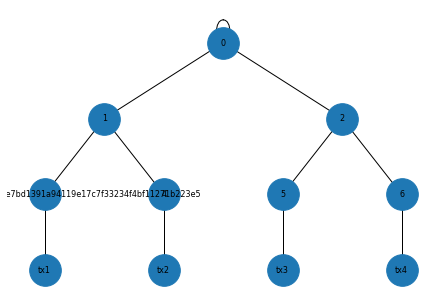

In [ ]:
labels[3] = hashlib.sha256(hashlib.sha256(b"tx1").digest()).hexdigest()

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

1) Construct Merkle hash tree using previously constructed graph by finding corresponding SHA256 hashes on vertices and plot obtained Merkle hash tree (1 point)

{0: Text(0, 4, '5eaee129fb6c4761a542e919f8fd0fa3f3c3d83a33bbeeec5a7e8772ddfb8f88'),
 1: Text(-2, 3, '41925fc3630f375e23755f04099f1b2c51f372a9792762b28478fbbc5faf1106'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, '856a4921cd32690244af7568e7bd1391a94119e17c7f33234f4bf11271b223e5'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'tx1'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

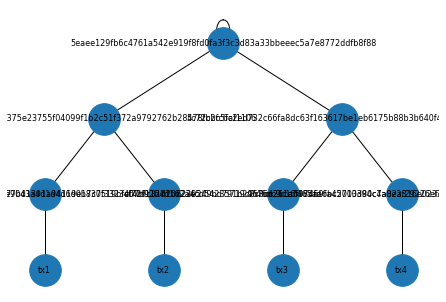

In [ ]:
labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6',
    7: 'tx1',
    8: 'tx2',
    9: 'tx3',
    10: 'tx4',
}

for i in [7, 8, 9, 10]:
    labels[parents[i]] = hashlib.sha256(hashlib.sha256(labels[i].encode('utf-8')).digest()).hexdigest()

def recalculate(i):
    hash = hashlib.sha256()
    childs = []
    for edge in G.edges(i):
        x, y = edge
        if y == parents[x]:
            continue
        childs.append(y)
    
    childs_hashes = ""
    for y in sorted(childs):
        childs_hashes = childs_hashes + labels[y]
    
    labels[i] = hashlib.sha256(hashlib.sha256(childs_hashes.encode('utf-8')).digest()).hexdigest()

for i in [2, 1, 0]:
    recalculate(i)

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

2) Provide a proof of correctness of leaf tx1 and set of leafs tx1-tx2 (1 point)

In [ ]:
# chech tx1
test = hashlib.sha256(hashlib.sha256(b'tx1').digest()).hexdigest()
test = hashlib.sha256(hashlib.sha256((test + labels[4]).encode('utf-8')).digest()).hexdigest()
test = hashlib.sha256(hashlib.sha256((test + labels[2]).encode('utf-8')).digest()).hexdigest()

assert(test == labels[0])

# chech tx1-tx2
test = labels[1]
test = hashlib.sha256(hashlib.sha256((test + labels[2]).encode('utf-8')).digest()).hexdigest()

assert(test == labels[0])

3) Change the value on leaf tx1 and recompute corresponding hashes. Plot newly obtained Merkle hash tree (1 point)

{0: Text(0, 4, 'aaea5428383cd618309d062ca84d423d3c557c3df85ee0b78665e7198c4aa88a'),
 1: Text(-2, 3, 'b1763689a6e9e1faec64e4aa8986542544f430e9f3c7d362c767c9904f94dc21'),
 2: Text(2, 3, '5c72c2fc6c2ed732c66fa8dc63f163617be1eb6175b88b3b640f440abb236e73'),
 3: Text(-3, 2, '74f2642ad9ca47e67ea56ef78d49869aa345d9a1f3a9222f5f07fc1f5d7b6ed8'),
 4: Text(-1, 2, '79043a4d1d4d6d0b830519bfc07b92b4d162a4cd54235719c2c3cc211a638dfd'),
 5: Text(1, 2, 'ef729c31d206229249bd791b29676d26cc7465aa6bc2003d80c7a82a316e0233'),
 6: Text(3, 2, '4746dc9c16f97469fa45710394c4a0e2f29226efc04cab47c29ce579ae19a74e'),
 7: Text(-3, 1, 'HODL SHIBA'),
 8: Text(-1, 1, 'tx2'),
 9: Text(1, 1, 'tx3'),
 10: Text(3, 1, 'tx4')}

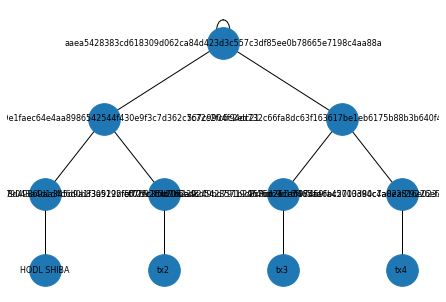

In [ ]:
labels[7] = 'HODL SHIBA'

node = parents[7]

while True:
    recalculate(node)
    if node == 0:
        break
    node = parents[node]

# and plot the graph again

nx.draw(G, positions, node_size = 1000)
nx.draw_networkx_labels(G, positions, labels = labels, font_size = 8)

4*) Implement a function to support the number of leafs $n =5, .., 16$. Let the value in the leaf $i$ be $txi$. Plot the tree. Provide the proof of correctness of leaf tx4 and set of leafs tx4-tx5 (3 bonus points)

In [ ]:
# code

## Problem 3 (6 + 2* points). Fork rate and main chain

Two miners are the only maintainers of the network. Each miner needs a random time to generate a new block which is modeled as exponential random variables with the rates $1/t_1$ and $1/t_2$ correspondingly. I.e. each miner generates Poisson point process of new blocks. The network is not ideal and it takes a random time to synchronize the block. The synchronization is modeled as an exponential random variable with the rate $1/t_0$. We assume both miners be honest and continue the longest known chain.

*Note.* The Poisson point process has memoryless and superposition properties [1]. So we can model three Poisson point processes independently and omit synchronization events if already synced.

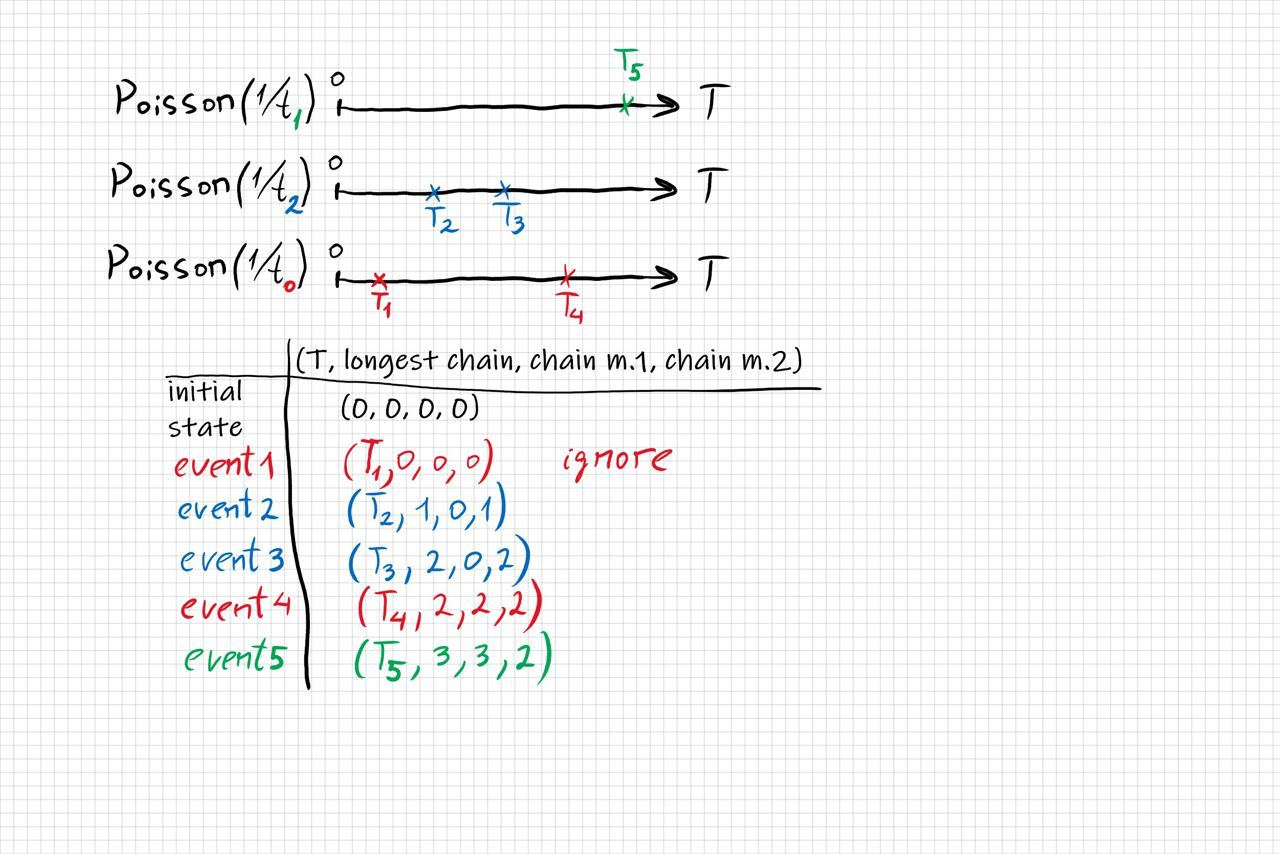

\[1\] Daley, Daryl J.; Vere-Jones, David (2003). An Introduction to the Theory of Point Processes: Volume I: Elementary Theory and Methods. Springer. ISBN 978-1475781090.

1) Implement a function to generate a sequence of tuples (time, longest chain, longest chain for miner 1, longest chain for miner 2) and run it for $t_1=t_2=1, t_0=0.5$ (1 point)

In [ ]:
# code

import numpy as np
import scipy.stats
import copy


def generate_tuples(t0 = 0.5, t1 = 1., t2 = 1., time_interval=10, return_event_type=False):
    def generate_events(t, time_interval = time_interval):
        n = scipy.stats.poisson(time_interval * (1/t)).rvs()
        return sorted(scipy.stats.uniform.rvs(
            loc=0, 
            scale=time_interval, 
            size=n)
        )

    event_times_1 = generate_events(t1)
    event_times_2 = generate_events(t2)
    event_sync = generate_events(t0)
    
    all = []
    all.extend(zip(event_times_1, ["one"] * len(event_times_1)))
    all.extend(zip(event_times_2, ["two"] * len(event_times_2)))
    all.extend(zip(event_sync, ["sync"] * len(event_sync)))

    result = []
    longest, len1, len2 = 0, 0, 0
    for event in sorted(all):
        time, event_type = event
        if event_type == "one":
            len1 += 1
        if event_type == "two":
            len2 += 1
        longest = max(len1, len2)
        if event_type == "sync":
            len1 = copy.copy(longest)
            len2 = copy.copy(longest)
        result_event = ()
        if return_event_type:
            result_event = (time, longest, len1, len2, event_type)
        else:
            result_event = (time, longest, len1, len2)
        result.append(result_event)

    return result
    
    
generate_tuples()


[(0.019080006501296376, 1, 0, 1),
 (0.38154414652974866, 1, 1, 1),
 (1.6513906613998186, 2, 1, 2),
 (1.7591001595582212, 2, 2, 2),
 (1.8660653814861683, 3, 2, 3),
 (2.589649455487253, 3, 3, 3),
 (2.66972303175638, 3, 3, 3),
 (2.6914597555457656, 3, 3, 3),
 (3.580323608663105, 3, 3, 3),
 (3.6318331263292967, 3, 3, 3),
 (3.738403092979552, 3, 3, 3),
 (3.9740070205927225, 3, 3, 3),
 (4.416748738677052, 4, 4, 3),
 (4.601813104049594, 4, 4, 4),
 (4.889415990891623, 4, 4, 4),
 (5.109218699092861, 4, 4, 4),
 (5.49898517639939, 4, 4, 4),
 (5.83125301740886, 4, 4, 4),
 (6.016906544326217, 4, 4, 4),
 (6.024903570828632, 5, 5, 4),
 (6.618473462020088, 5, 5, 5),
 (6.926961965421618, 5, 5, 5),
 (7.043724900130039, 5, 5, 5),
 (7.089136241940329, 6, 5, 6),
 (7.295280148323574, 6, 6, 6),
 (7.414980228492802, 7, 7, 6),
 (7.771274500440138, 7, 7, 7),
 (7.778668393539673, 7, 7, 7),
 (7.875238942203375, 8, 8, 7),
 (7.886154812903877, 9, 9, 7),
 (8.368399181162683, 9, 9, 8),
 (8.425681030646148, 10, 10, 8)

2) Plot the ratio of the blocks in the main chain to the number of generated blocks as a function of $t_0 \in (0, 2]$ for fixed $t_1=t_2=1$ (2 points)

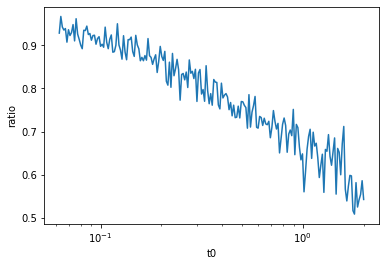

In [ ]:
from networkx.algorithms.similarity import generate_random_paths
t0s = np.logspace(-4, 1, 200, base=2) 
ratios = []

for t0 in t0s:
    cur = []
    for i in range(10):
        tuples = generate_tuples(t0, t1 = 1., t2 = 1., time_interval=10, return_event_type=True)

        generated_blocks = 0
        main_chain_blocks = 0
        for item in tuples:
            _, blocks, _, _, item_type = item
            if not item_type == "sync":
                generated_blocks += 1
            else:
                main_chain_blocks = blocks
    
        cur.append(main_chain_blocks / generated_blocks)

    ratios.append(np.mean(cur))

plt.plot(t0s, ratios)
plt.xlabel("t0")
plt.ylabel("ratio")
plt.xscale("log")

3) Let there be an adversary miner 3 with a rate $t_3 = 0.9$ and instant communication with miners 1 and 2. Let him mine his own branch. Plot the empirical probability to go $6$ blocks ahead of the miners' 1 and 2 main chain during $T=100$ as a function of $t_0$ for fixed $t_1=t_2=1$ (3 points)

In [95]:
# code

import numpy as np
import scipy.stats
import copy


def if_hacked(t0 = 0.5, t1 = 1., t2 = 1., t3 = 0.9, time_interval=100):
    def generate_events(t, time_interval = time_interval):
        n = scipy.stats.poisson(time_interval * (1/t)).rvs()
        return sorted(scipy.stats.uniform.rvs(
            loc=0, 
            scale=time_interval, 
            size=n)
        )

    event_times_1 = generate_events(t1)
    event_times_2 = generate_events(t2)
    event_times_3 = generate_events(t3)
    event_sync = generate_events(t0)
    
    all = []
    all.extend(zip(event_times_1, ["1"] * len(event_times_1)))
    all.extend(zip(event_times_2, ["2"] * len(event_times_2)))
    all.extend(zip(event_times_3, ["3"] * len(event_times_3)))
    all.extend(zip(event_sync, ["sync"] * len(event_sync)))

    result = []
    longest, new1, new2, new3 = 0, 0, 0, 0
    for event in sorted(all):
        time, event_type = event
        if event_type == "1":
            new1 += 1
        if event_type == "2":
            new2 += 1
        if event_type == "3":
            new3 += 1
            
        new3 = max(new1, new2, new3)

        if event_type == "sync":
            longest += max(new1, new2, new3)
            new1, new2, new3 = 0, 0, 0
        
        if new3 >= 6 + max(new1, new2):
            return True

    return False


In [96]:
from networkx.algorithms.similarity import generate_random_paths
t0s = np.linspace(0.5, 5, 20) 
probabilities = []

for t0 in t0s:
    cur = []
    for i in range(1000):
        hacked = if_hacked(t0, t1 = 1., t2 = 1., t3=0.9, time_interval=100)

        cur.append(hacked)

    probabilities.append(np.sum(cur) / len(cur))


Text(0, 0.5, 'probability')

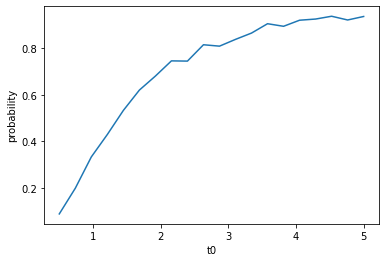

In [97]:
plt.plot(t0s, probabilities)
plt.xlabel("t0")
plt.ylabel("probability")
# plt.xscale("log")

4*) Demonstrate 51% attack by miner 3 (2 bonus points)

История такая, что если есть майнер с 51% мощностями, то он может обогнать главную цепь и замайнить свою вредоносную транзакцию

Всех остальных майнеров можно объединить в одного и сказать что их мощности в сумме 49%

Чтобы вредоносному майнеру внести свой вредоносный блок в блокчейн, ему надо успеть замайнить свой вредоносный блок и догнать основную сеть + обогнать на 1 блок

In [ ]:
# code

import numpy as np
import scipy.stats
import copy


def generate_tuples(t0 = 0.5, t1 = 1., t2 = 1., time_interval=10, return_event_type=False):
    def generate_events(t, time_interval = time_interval):
        n = scipy.stats.poisson(time_interval * (1/t)).rvs()
        return sorted(scipy.stats.uniform.rvs(
            loc=0, 
            scale=time_interval, 
            size=n)
        )

    event_times_1 = generate_events(t1)
    event_times_2 = generate_events(t2)
    event_sync = generate_events(t0)
    
    all = []
    all.extend(zip(event_times_1, ["one"] * len(event_times_1)))
    all.extend(zip(event_times_2, ["two"] * len(event_times_2)))
    all.extend(zip(event_sync, ["sync"] * len(event_sync)))

    result = []
    longest, new1, new2 = 0, 0, 0
    for event in sorted(all):
        time, event_type = event
        if event_type == "one":
            new1 += 1
        if event_type == "two":
            new2 += 1

        result_event = ()
        if return_event_type:
            result_event = (time, longest, new1, new2, event_type)
        else:
            result_event = (time, longest, new1, new2)
        result.append(result_event)

        if event_type == "sync":
            longest += max(new1, new2)
            if new2 > new1:
                print(*result, sep="\n")
                print("Miner with 51% of power won")
                return
                
            new1, new2 = 0, 0


In [ ]:
generate_tuples(t0 = 1, t1 = .49, t2 = .51, time_interval=10, return_event_type=True)

(0.4507066891370026, 0, 1, 0, 'one')
(1.087925096471103, 0, 1, 1, 'two')
(1.221733944851634, 0, 1, 1, 'sync')
(1.4632255715586961, 1, 0, 1, 'two')
(1.4689195306779779, 1, 1, 1, 'one')
(1.6462745657500155, 1, 1, 1, 'sync')
(1.7090056432584444, 2, 0, 1, 'two')
(1.8098486009714843, 2, 0, 2, 'two')
(2.147101453018354, 2, 0, 2, 'sync')
Miner with 51% of power won


In [ ]:
generate_tuples(t0 = 1, t1 = .49, t2 = .51, time_interval=10, return_event_type=True)

(0.022965122052367448, 0, 1, 0, 'one')
(0.19893751068733034, 0, 1, 1, 'two')
(0.6029417102725754, 0, 2, 1, 'one')
(0.9554782314686261, 0, 2, 2, 'two')
(1.8335758605500874, 0, 3, 2, 'one')
(1.8876374341183633, 0, 4, 2, 'one')
(1.9873909994980155, 0, 5, 2, 'one')
(1.9878068038709995, 0, 6, 2, 'one')
(2.2414437547509647, 0, 7, 2, 'one')
(2.399984060862036, 0, 8, 2, 'one')
(2.4568079279207202, 0, 9, 2, 'one')
(2.665578017654248, 0, 9, 2, 'sync')
(2.8483443897489282, 9, 1, 0, 'one')
(3.0074185674618947, 9, 2, 0, 'one')
(3.5815452242802435, 9, 2, 1, 'two')
(3.723295626221784, 9, 2, 1, 'sync')
(3.9562814273084443, 11, 1, 0, 'one')
(4.094946058437204, 11, 1, 1, 'two')
(4.114486336569881, 11, 1, 2, 'two')
(4.136527357264935, 11, 2, 2, 'one')
(4.9433234738346234, 11, 2, 3, 'two')
(5.31900318289174, 11, 3, 3, 'one')
(5.374735716398774, 11, 4, 3, 'one')
(5.554199693483758, 11, 4, 4, 'two')
(5.94718940077774, 11, 5, 4, 'one')
(5.97851766378878, 11, 6, 4, 'one')
(6.170919694654323, 11, 6, 5, 'two')
